In [ ]:
# Required imports:
import tarfile
# Open the Images tar file:
images_tar = tarfile.open('CACD2000.tar.gz')
# Excrat the compressed file:
images_tar.extractall()

In [1]:
# Required imports:
import dlib
import cv2
import os
import numpy as np
from PIL import Image
import pandas as pd
import shutil

In [2]:
# Required imports:
import face_detection
import face_swap
from face_detection import select_face, select_all_faces
from face_swap import face_swap
from random import randint
import os
import matplotlib.pyplot as plt
%matplotlib inline
import faceBlendCommon as fbc

In [4]:
# Folder Existance Checking and Creating
root_path = './'

orig_path = os.path.join(root_path, 'CACD2000')
out_path = os.path.join(root_path, 'CACD2000-centered')

if not os.path.exists(orig_path):
    raise ValueError(f'Original image path {orig_path} does not exist.')

if not os.path.exists(out_path):
    os.mkdir(out_path)

In [5]:
model_path = os.path.join(root_path,'Model')
if not os.path.exists(model_path):
    os.mkdir(model_path)

In [6]:
lips_aug_path = os.path.join(root_path,'CACD2000-Lipstick')
if not os.path.exists(lips_aug_path):
    os.mkdir(lips_aug_path)

In [7]:
eyecolor_aug_path = os.path.join(root_path,'CACD2000-EyeColor')
if not os.path.exists(eyecolor_aug_path):
    os.mkdir(eyecolor_aug_path)

In [8]:
glass_aug_path = os.path.join(root_path,'CACD2000-Glass')
if not os.path.exists(glass_aug_path):
    os.mkdir(glass_aug_path)

In [9]:
lips_eyecolor_aug_path = os.path.join(root_path,'CACD2000-Lipstick-EyeColor')
if not os.path.exists(lips_eyecolor_aug_path):
    os.mkdir(lips_eyecolor_aug_path)

In [45]:
# Filecount checking in specific folder
import os

count = 0
#dir_path = 'CACD2000-EyeColor'
dir_path = 'CACD2000-Lipstick-EyeColor'
#dir_path = 'CACD2000'
for path in os.scandir(dir_path):
    if path.is_file():
        count += 1
print('file count:', count)

file count: 389672


In [6]:
# Define face swap function
def swap_face(src_img_path,dst_img_path,out_img_path):
  #os.system("python main.py --src {} --dst {} --out {} --correct_color".format(src_img_path,dst_img_path,out_img_path))
  ! venv/bin/python main.py --src $src_img_path --dst $dst_img_path --out $out_img_path --correct_color --no_debug_window

In [1]:
# Face swapping of training images
import concurrent.futures
from random import randint
train_df = pd.read_csv('afad_train.csv')
src_img_path_lst = []
dst_img_path_lst = []
out_img_path_lst = []
#age_list = [15]
#for idx,picture_name,age in train_df.values:
  #print(age)
  #age_list.append(age) 
  #if age == 29:
        #break
age_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
age_min_idx = train_df.groupby('age')['Unnamed: 0'].min() .reset_index(name = 'Unnamed: 0')
for ages in age_list:
  for idx,picture_name,age in train_df.loc[train_df['age'] == ages].values:
    min_idx = age_min_idx.loc[age_min_idx['age'] == ages, 'Unnamed: 0']
    src_img_file = train_df['file'].iloc[min_idx+randint(0, 10)]
    src_img_path_lst.append(os.path.join(orig_path, src_img_file.values[0]))
    dst_img_path_lst.append(os.path.join(orig_path, picture_name))
    out_pic_name = str(picture_name.split('.')[0]) + '_swap.jpg'
    out_img_path_lst.append(os.path.join(out_path,out_pic_name))
    
  with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(swap_face, src_img_path_lst,dst_img_path_lst,out_img_path_lst)

NameError: name 'pd' is not defined

##### for picture_name in os.listdir(orig_path):
  #print(picture_name)
  if (picture_name.startswith("14_Carly_Chaikin_0004")):
    print(picture_name)

In [12]:
# Copying the original images into augmented folder
import shutil 
for picture_name in os.listdir(orig_path):
  filename = os.path.join(orig_path, picture_name)
  shutil.copy(filename, lips_aug_path)

In [16]:
# Copying the original images into augmented folder
import shutil 
for picture_name in train_df['file'].values:
  filename = os.path.join(orig_path, picture_name)
  shutil.copy(filename, out_path)

In [42]:
test_df = pd.read_csv('cacd_test.csv')
for picture_name in test_df['file'].values:
  filename = os.path.join(orig_path, picture_name)
  shutil.copy(filename, out_path)

In [43]:
valid_df = pd.read_csv('cacd_valid.csv')
for picture_name in valid_df['file'].values:
  filename = os.path.join(orig_path, picture_name)
  shutil.copy(filename, out_path)

In [39]:
# Creating training csv for augmented images
import pandas as pd
L  = []
for picture_name in os.listdir(lips_eyecolor_aug_path):
  L.append(picture_name)

df = pd.DataFrame(L, columns=['string_values'])
df.to_csv(r'Filelist_Lipstick_EyeColor.csv', index = False)

In [25]:
# Copying the original images into augmented folder
import shutil 
for file_name in os.listdir(eyecolor_aug_path):
  filename = os.path.join(eyecolor_aug_path, file_name)
  shutil.copy(filename, lips_eyecolor_aug_path)

In [40]:
import glob
import shutil 
count = 0
for p in glob.glob('CACD2000-Lipstick/*.jpg'):
    if p.endswith('_Lip.jpg'):    
        #os.remove(clean_up)
        #print(p)
        #shutil.copy(p, lips_eyecolor_aug_path)
        count = count + 1
print(count)


112886


In [43]:
count = 0
for p in glob.glob('CACD2000-Lipstick-EyeColor/*.jpg'):
    if p.endswith('_EyeColor.jpg'):    
        #os.remove(clean_up)
        #print(p)
        #shutil.copy(p, lips_eyecolor_aug_path)
        count = count + 1
print(count)

113340


In [74]:
# Checking one specific file exists inside the folder
for picture_name in os.listdir(orig_path):
  #print(picture_name)
  if (picture_name.startswith("38_Ethan_Hawke_0001")):
    print(picture_name)

38_Ethan_Hawke_0001.jpg


In [9]:
# Lipstick Augmentation required functions
import random
lipstick_colors = {"vamptastic_plum": (97, 45, 130),
                   "red_dahlia": (51, 30, 136),
                   "flamenco_red": (42, 31, 192),
                   "chery_red": (63, 45, 222),
                   "caramel_nude": (120, 131, 201),
                   "mango_tango": (103, 92, 223),
                   "neon_red": (79, 32, 223),
                   "electric_orchid": (139, 64, 243),
                   "forbbiden_fuchsia": (105, 39, 184),
                   "sweet_marsala": (93, 67, 164)}


def getLipsMask(size, lips):
    # Find Convex hull of all points
    hullIndex = cv2.convexHull(np.array(lips), returnPoints=False)
    # Convert hull index to list of points
    hullInt = []
    for hIndex in hullIndex:
        hullInt.append(lips[hIndex[0]])
    # Create mask such that convex hull is white
    mask = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32(hullInt), (255, 255, 255))
    return mask


def apply_color_to_mask(mask):
    # Get random lipstick color
    color_name, color = random.choice(list(lipstick_colors.items()))
    #print("[INFO] Color Name: {}".format(color_name))
    b, g, r = cv2.split(mask)
    b = np.where(b > 0, color[0], 0).astype('uint8')
    g = np.where(g > 0, color[1], 0).astype('uint8')
    r = np.where(r > 0, color[2], 0).astype('uint8')
    return cv2.merge((b, g, r)), color_name

In [13]:
def alphaBlend(alpha, foreground, background):
    fore = np.zeros(foreground.shape, dtype=foreground.dtype)
    fore = cv2.multiply(alpha, foreground, fore, 1 / 255.0)
    alphaPrime = np.ones(alpha.shape, dtype=alpha.dtype) * 255 - alpha
    back = np.zeros(background.shape, dtype=background.dtype)
    back = cv2.multiply(alphaPrime, background, back, 1 / 255.0)
    outImage = cv2.add(fore, back)
    return outImage

In [14]:
def get_angle(p1, p2):
    if p2[1] <= p1[1]:
        y = np.abs(p1[1] - p2[1])
    else:
        y = p1[1] - p2[1]
    x = np.abs(p1[0] - p2[0])
    return np.rad2deg(np.arctan2(y, x))

In [15]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [2]:
# Delete all files from one specific folder
import os, shutil
out_path = 'CACD2000-centered' 
for filename in os.listdir(out_path):
    file_path = os.path.join(out_path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [14]:
# Eye Color Augmentation
train_df = pd.read_csv('cacd_train.csv')
print(orig_path)
#for picture_name in os.listdir(orig_path):
for picture_name in train_df['file'].values:
  img = cv2.imread(os.path.join(orig_path, picture_name))
  rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #break
  out_pic_name = str(picture_name.split('.')[0]) + '_EyeColor.jpg'
  #img = cv2.imread("/content/CACD2000/16_Chris_Colfer_0007.jpg")
  #rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #plt.imshow(rgb_image)
  ## Draw Eye's centers points in red color
  clone_im = rgb_image.copy()
  points = fbc.getLandmarks(faceDetector, landmarkDetector, rgb_image)
  if points == []:
    print(picture_name)
    print("No Landmarks Detected")
  else:
    for point in points:
      #print(point)
      ## Left Eye Center
      left_eye = ((np.asarray(points[37]) + np.asarray(points[38]) + np.asarray(points[40]) + np.asarray(points[41])) / 4).astype(int)
      ## Right Eye Center
      right_eye = ((np.asarray(points[43]) + np.asarray(points[44]) + np.asarray(points[46]) + np.asarray(points[47])) / 4).astype(int)
  cv2.circle(clone_im, tuple(left_eye), 2, (0, 0, 255), -1)
  cv2.circle(clone_im, tuple(right_eye), 2, (0, 0, 255), -1)
  clone_im = cv2.cvtColor(clone_im,cv2.COLOR_BGR2RGB)
  cv2.imwrite(os.path.join(eyecolor_aug_path, out_pic_name), clone_im)

./CACD2000
35_Mary_McCormack_0012.jpg
No Landmarks Detected
56_Ray_McKinnon_0001.jpg
No Landmarks Detected
48_Sherilyn_Fenn_0013.jpg
No Landmarks Detected
25_Kirsten_Dunst_0007.jpg
No Landmarks Detected
50_Julian_Sands_0005.jpg
No Landmarks Detected
23_Jessica_Lucas_0008.jpg
No Landmarks Detected
60_Robert_Davi_0006.jpg
No Landmarks Detected
46_Michael_Nyqvist_0009.jpg
No Landmarks Detected
34_Daniel_Gillies_0010.jpg
No Landmarks Detected
43_Gina_Gershon_0013.jpg
No Landmarks Detected
50_Whoopi_Goldberg_0011.jpg
No Landmarks Detected
24_Sibel_Kekilli_0004.jpg
No Landmarks Detected
26_Taylor_Kinney_0002.jpg
No Landmarks Detected
52_Donald_Gibb_0009.jpg
No Landmarks Detected
35_Michelle_Borth_0013.jpg
No Landmarks Detected
54_Judd_Nelson_0006.jpg
No Landmarks Detected
22_Laura_Vandervoort_0004.jpg
No Landmarks Detected
33_James_Wan_0008.jpg
No Landmarks Detected
56_Brad_Bird_0011.jpg
No Landmarks Detected
35_Idris_Elba_0012.jpg
No Landmarks Detected
42_Corey_Feldman_0001.jpg
No Landmarks

In [13]:
# Lipstick Augmentation
#out_path = 'CACD2000-centered' 
train_df = pd.read_csv('cacd_train.csv')
#for picture_name in os.listdir(orig_path):
for picture_name in train_df['file'].values:
  #print(picture_name)
  out_pic_name = str(picture_name.split('.')[0]) + '_Lip.jpg'
  img = cv2.imread(os.path.join(orig_path, picture_name))
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  points = fbc.getLandmarks(faceDetector, landmarkDetector, rgb_img)
  if points == []:
    print(picture_name)
    print("No Landmarks Detected")
    continue
  else:
    ## Select points of lips and create "lips mask"
    lips = [points[x] for x in range(48, 68)]
    mouth = [points[x] for x in range(60, 68)]
  try:
    contours = [np.asarray(lips, dtype=np.int32)]
    (x, y, w, h) = cv2.boundingRect(contours[0])
    center = (int(x+w/2), int(y+h/2))
    mask = getLipsMask(img.shape, lips)
    mouth_mask = getLipsMask(img.shape, mouth)
    mouth_mask = cv2.bitwise_not(mouth_mask)
    #mask = cv2.bitwise_and(mask, mask, mask=mouth_mask[:, :, 0])

    ## Dilate lips mask to include some skin around the mouth
    maskHeight, maskWidth = mask.shape[0:2]
    maskSmall = cv2.resize(mask, (600, int(maskHeight * 600.0 / maskWidth)))
    maskSmall = cv2.dilate(maskSmall, (3, 3))
    maskSmall = cv2.GaussianBlur(maskSmall, (5, 5), 0, 0)
    mask = cv2.resize(maskSmall, (maskWidth, maskHeight))

    ## Apply color to mask
    color_mask, color_name = apply_color_to_mask(mask)

    ## Seamless cloning the mask with the lips. In this case MIXED_CLONE allow to maintain the lips texture
    masked_lips = cv2.bitwise_and(img, img, mask=mask[:, :, 0])
    output = cv2.seamlessClone(masked_lips, color_mask, mask[:, :, 0], center, cv2.MIXED_CLONE)

    ## Alpha Blending
    final_image = alphaBlend(mask, output, img)
    #cv2.putText(final, "Lipstick Color: {}".format(color_name), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    #final_image = np.hstack((img, final))
  except:
    print("Lips Augmentation not possible for: ", picture_name) 
    continue
  cv2.imwrite(os.path.join(lips_aug_path, out_pic_name), final_image)

35_Mary_McCormack_0012.jpg
No Landmarks Detected
56_Ray_McKinnon_0001.jpg
No Landmarks Detected
48_Sherilyn_Fenn_0013.jpg
No Landmarks Detected
25_Kirsten_Dunst_0007.jpg
No Landmarks Detected
50_Julian_Sands_0005.jpg
No Landmarks Detected
23_Jessica_Lucas_0008.jpg
No Landmarks Detected
60_Robert_Davi_0006.jpg
No Landmarks Detected
46_Michael_Nyqvist_0009.jpg
No Landmarks Detected
34_Daniel_Gillies_0010.jpg
No Landmarks Detected
43_Gina_Gershon_0013.jpg
No Landmarks Detected
50_Whoopi_Goldberg_0011.jpg
No Landmarks Detected
24_Sibel_Kekilli_0004.jpg
No Landmarks Detected
26_Taylor_Kinney_0002.jpg
No Landmarks Detected
52_Donald_Gibb_0009.jpg
No Landmarks Detected
35_Michelle_Borth_0013.jpg
No Landmarks Detected
54_Judd_Nelson_0006.jpg
No Landmarks Detected
22_Laura_Vandervoort_0004.jpg
No Landmarks Detected
33_James_Wan_0008.jpg
No Landmarks Detected
56_Brad_Bird_0011.jpg
No Landmarks Detected
35_Idris_Elba_0012.jpg
No Landmarks Detected
42_Corey_Feldman_0001.jpg
No Landmarks Detected
5

In [21]:
def sunglass_aug(out_path,orig_path,picture_name,glass_path):
  #out_path = '/content/CACD2000-centered' 
  #train_df = pd.read_csv(train_df_path)
  #train_df = pd.read_csv('/content/drive/MyDrive/Data/cacd_train.csv')
  ## Load glasses image with alpha channel
  #glasses = cv2.imread("/content/drive/MyDrive/Data/sunglass.png", cv2.IMREAD_UNCHANGED)
  #glasses = cv2.imread("/content/drive/MyDrive/Data/NicePng_lentes-png_2399864.png", cv2.IMREAD_UNCHANGED)
  glasses = cv2.imread(glass_path,cv2.IMREAD_UNCHANGED)
  #glasses = cv2.imread("/content/drive/MyDrive/Data/sunglasses_PNG4.png", cv2.IMREAD_UNCHANGED)
  #left_eyeglass = np.asarray([100, 70])
  #left_eyeglass = np.asarray([300, 115])
  left_eyeglass = np.asarray([3000, 3000])
  #right_eyeglass = np.asarray([255, 70])
  #right_eyeglass = np.asarray([900, 115])
  right_eyeglass = np.asarray([11000, 3000])

  ## Get the euclidean distance between eyeglasses centers
  inter_lens_distance = np.linalg.norm(left_eyeglass - right_eyeglass)
  #for picture_name in os.listdir(orig_path):
  #for picture_name in train_df['file'].values:
  img = cv2.imread(os.path.join(orig_path, picture_name))
  rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  out_pic_name = str(picture_name.split('.')[0]) + '_Glass.jpg'
  points = fbc.getLandmarks(faceDetector, landmarkDetector, rgb_image)
  if points == []:
    print(picture_name)
    print("No Landmarks Detected")
  else:
    for point in points:
        ## Left Eye Center
        left_eye = ((np.asarray(points[37]) + np.asarray(points[38]) + np.asarray(points[40]) + np.asarray(points[41])) / 4).astype(int)
        ## Right Eye Center
        right_eye = ((np.asarray(points[43]) + np.asarray(points[44]) + np.asarray(points[46]) + np.asarray(points[47])) / 4).astype(int)

  ## Angle Between eyes
  # Know this angle, allow to rotate the glasses image if the eyes are not aligned horizontally
  # and then rotate the glasses image to adjust to face angle
  rotation_angle = round(get_angle(left_eye, right_eye), 3)
  #print("[INFO] Rotation Angle: {}°".format(rotation_angle))

  ## Get the euclidean distance between centers of eyes
  # This allow to properly scale the glasses size, that depend of face size
  inter_eye_distance = np.linalg.norm(left_eye - right_eye)
  #print("[INFO] Inter Eyes Distance: {}".format(round(inter_eye_distance, 3)))

  ## Get the euclidean distance between eyeglasses centers
  inter_lens_distance = np.linalg.norm(left_eyeglass - right_eyeglass)
  #print("[INFO] Inter Eyeglasses Distance: {}".format(round(inter_lens_distance, 3)))

  ## Compute the ratio and scale the glasses image
  ratio = inter_eye_distance / inter_lens_distance
  #print("[INFO] Scale Factor: {}".format(round(ratio, 3)))
  w_final = int(glasses.shape[1] * ratio)
  h_final = int(glasses.shape[0] * ratio)
  resized_glasses = cv2.resize(glasses, (w_final, h_final), interpolation=cv2.INTER_AREA)
  #print(resized_glasses.shape)

  ## Get center of eyeglasses in the scaled size
  left_lens_resized = (left_eyeglass * ratio).astype(int)
  right_lens_resized = (right_eyeglass * ratio).astype(int)
  clone_resized_glasses = resized_glasses.copy()
  #cv2.circle(clone_resized_glasses, tuple(left_lens_resized), 2, (0, 0, 255), -1)
  #cv2.circle(clone_resized_glasses, tuple(right_lens_resized), 2, (0, 0, 255), -1)
  #clone_resized_glasses = cv2.cvtColor(clone_resized_glasses,cv2.COLOR_BGR2RGB)

  ## Create canvas for glasses
  canvas = np.zeros((img.shape[0], img.shape[1], 4), dtype=img.dtype)
  x = left_eye[0] - left_lens_resized[0]
  y = left_eye[1] - left_lens_resized[1]
  w = resized_glasses.shape[1]
  h = resized_glasses.shape[0]
  ## "Paste" the glasses image on the canvas and rotate the canvas to adjuts to the eyes angle
  canvas[y:y + h, x:x + w, :] = resized_glasses
  M = cv2.getRotationMatrix2D(tuple(left_eye.astype(float)), rotation_angle, 1.0)
  rotated_canvas = cv2.warpAffine(canvas, M, (canvas.shape[1], canvas.shape[0]))
  rotated_canvas_rbg = cv2.cvtColor(rotated_canvas,cv2.COLOR_BGR2RGB)

  ## Separate the mask from the bgra rotated_canvas
  b, g, r, a = cv2.split(rotated_canvas)
  bgr_rotated_canvas = cv2.merge([b, g, r])
  mask_rotated_canvas = cv2.merge([a, a, a])

  # Blurring face mask to alpha blend to hide seams
  # In this case the blurring is minimum, mainly to smooth uneven edges
  # Also, I omit the step of erode the mask, because the edges between
  # the face and the glasses in reality are not "seamless".
  maskHeight, maskWidth = mask_rotated_canvas.shape[0:2]
  maskSmall = cv2.resize(mask_rotated_canvas, (400, int(maskHeight * 400.0 / maskWidth)))
  maskSmall = cv2.GaussianBlur(maskSmall, (3, 3), 0, 0)
  mask = cv2.resize(maskSmall, (maskWidth, maskHeight))
  bgr = cv2.bitwise_and(bgr_rotated_canvas, bgr_rotated_canvas, mask=a)
  final = alphaBlend(mask, bgr, img)
  #final_image = np.hstack((img, final))
  final_image = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
  cv2.imwrite(os.path.join(out_path, out_pic_name), final_image)

In [35]:
import concurrent.futures
out_path_lst = []
orig_path_lst = []
picture_name_lst = []
glass_path_lst = []
#train_df_path = '/content/drive/MyDrive/Data/cacd_train.csv'
glass_path = 'sunglasses_PNG4.png'
#glass_path = '/content/drive/MyDrive/Data/sunglasses_PNG4.png'
train_df = pd.read_csv('cacd_train.csv')
age_list = [47,48] #,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
for ages in age_list:
  print(ages)
  for idx,picture_name,age in train_df.loc[train_df['age'] == ages].values:
    out_path_lst.append(glass_aug_path)
    orig_path_lst.append(orig_path)
    picture_name_lst.append(picture_name)
    glass_path_lst.append(glass_path)
#for picture_name in train_df['file'].values:
  try:
    with concurrent.futures.ProcessPoolExecutor() as executor:
      executor.map(sunglass_aug, out_path_lst,orig_path_lst,picture_name_lst,glass_path_lst)
  except:
    print("Glass Augmentation not possible for: ", picture_name) 
    continue

47
61_Tress_MacNeille_0008.jpg
No Landmarks Detected
61_Edward_Zwick_0002.jpg
No Landmarks Detected
61_Christine_Baranski_0004.jpg
No Landmarks Detected
48
61_Tress_MacNeille_0008.jpg
No Landmarks Detected
61_Edward_Zwick_0002.jpg
No Landmarks Detected
61_Christine_Baranski_0004.jpg
No Landmarks Detected
62_Chris_Cooper_0009.jpg
No Landmarks Detected
62_John_McTiernan_0004.jpg
No Landmarks Detected


In [10]:
# coding: utf-8

#############################################
# Cross Entropy with ResNet-34
#############################################

# Imports

import os
import time
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import argparse
import sys

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchvision import transforms
from PIL import Image

In [11]:
torch.backends.cudnn.deterministic = True

#TRAIN_CSV_PATH = '/content/drive/MyDrive/Data/cacd_train.csv'
#VALID_CSV_PATH = '/content/drive/MyDrive/Data/cacd_valid.csv'
#TEST_CSV_PATH = '/content/drive/MyDrive/Data/cacd_test.csv'
#TRAIN_CSV_PATH = 'cacd_train_faceswap.csv'
TRAIN_CSV_PATH = 'cacd_train_lipstick_eyecolor.csv'
VALID_CSV_PATH = 'cacd_valid.csv'
TEST_CSV_PATH = 'cacd_test.csv'
#IMAGE_PATH = '/shared_datasets/CACD/centercropped/jpg'
#/content/drive/MyDrive/Data
#IMAGE_PATH = './CACD2000-centered/jpg'
#IMAGE_PATH = 'CACD2000-EyeColor'
IMAGE_PATH = 'CACD2000-Lipstick-EyeColor'

In [12]:
##########################
# SETTINGS
##########################

# Hyperparameters
learning_rate = 0.0005
#num_epochs = 200
num_epochs = 50
#num_epochs = 1

# Architecture
NUM_CLASSES = 49
BATCH_SIZE = 256
GRAYSCALE = False

NUM_WORKERS = 3

In [13]:
#from torchvision.transforms.transforms import ColorJitter
###################
# Dataset
###################


class CACDDataset(Dataset):
    """Custom Dataset for loading CACD face images"""

    def __init__(self,
                 csv_path, img_dir, transform=None):

        df = pd.read_csv(csv_path, index_col=0)
        self.img_dir = img_dir
        self.csv_path = csv_path
        self.img_names = df['file'].values
        self.y = df['age'].values
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir,
                                      self.img_names[index]))
        # Load images here for online training augmentation
        if self.transform is not None:
            img = self.transform(img)

        label = self.y[index]

        return img, label

    def __len__(self):
        return self.y.shape[0]


custom_transform = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.RandomCrop((120, 120)),
                                       #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
                                       transforms.RandomRotation(15),
                                       transforms.RandomHorizontalFlip(0.7),
                                       transforms.RandomVerticalFlip(0.6),
                                       #transforms.GaussianBlur(kernel_size=(7, 13), sigma=(0.1, 0.2)),
                                       transforms.ToTensor()])

train_dataset = CACDDataset(csv_path=TRAIN_CSV_PATH,
                            img_dir=IMAGE_PATH,
                            transform=custom_transform)


custom_transform2 = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.CenterCrop((120, 120)),
                                       transforms.ToTensor()])

test_dataset = CACDDataset(csv_path=TEST_CSV_PATH,
                           img_dir=IMAGE_PATH,
                           transform=custom_transform2)

valid_dataset = CACDDataset(csv_path=VALID_CSV_PATH,
                            img_dir=IMAGE_PATH,
                            transform=custom_transform2)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=NUM_WORKERS)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=NUM_WORKERS)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=NUM_WORKERS)

In [14]:
##########################
# MODEL
##########################


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [15]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes, grayscale):
        self.inplanes = 64
        if grayscale:
            in_dim = 1
        else:
            in_dim = 3
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(in_dim, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(4)
        self.fc = nn.Linear(512, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, (2. / n)**.5)
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)

        x = x.view(x.size(0), -1)
        logits = self.fc(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas


def resnet34(num_classes, grayscale):
    """Constructs a ResNet-34 model."""
    model = ResNet(block=BasicBlock, 
                   layers=[3, 4, 6, 3],
                   num_classes=num_classes,
                   grayscale=grayscale)
    return model

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
RANDOM_SEED = 0

In [18]:
###########################################
# Initialize Cost, Model, and Optimizer
###########################################

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
model = resnet34(NUM_CLASSES, GRAYSCALE)

model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [19]:
def compute_mae_and_mse(model, data_loader, device):
    mae, mse, num_examples = 0., 0., 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        mae += torch.sum(torch.abs(predicted_labels - targets))
        mse += torch.sum((predicted_labels - targets)**2)
    mae = mae.float() / num_examples
    mse = mse.float() / num_examples
    return mae, mse

In [21]:
PATH = 'Model'
start_time = time.time()
train_rmse_lst = []
train_mae_lst = []
test_rmse_lst = []
test_mae_lst = []
best_mae, best_rmse, best_epoch = 999, 999, -1
for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        features = features.to(device)
        targets = targets.to(device)

        # FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()

        cost.backward()

        # UPDATE MODEL PARAMETERS
        optimizer.step()

        # LOGGING
        if not batch_idx % 50:
            s = ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f'
                 % (epoch+1, num_epochs, batch_idx,
                     len(train_dataset)//BATCH_SIZE, cost))
            print(s)
            #with open(LOGFILE, 'a') as f:
                #f.write('%s\n' % s)

    model.eval()
    with torch.set_grad_enabled(False):
        valid_mae, valid_mse = compute_mae_and_mse(model, valid_loader,
                                                   device=device)
        test_mae, test_mse = compute_mae_and_mse(model, test_loader,
                                                device=device)

    if valid_mae < best_mae:
        best_mae, best_rmse, best_epoch = valid_mae, torch.sqrt(valid_mse), epoch
        ########## SAVE MODEL #############
        torch.save(model.state_dict(), os.path.join(PATH, 'best_model_cacd_lipstick_eyecolor_geo.pt'))


    s = 'MAE/RMSE: | Current Valid: %.2f/%.2f Ep. %d | Best Valid : %.2f/%.2f Ep. %d' % (
        valid_mae, torch.sqrt(valid_mse), epoch, best_mae, best_rmse, best_epoch)
    print(s)
    #with open(LOGFILE, 'a') as f:
        #f.write('%s\n' % s)
    test_rmse_lst.append(torch.sqrt(test_mse))
    test_mae_lst.append(test_mae)

    s = 'Time elapsed: %.2f min' % ((time.time() - start_time)/60)
    print(s)
    #with open(LOGFILE, 'a') as f:
        #f.write('%s\n' % s)

Epoch: 001/050 | Batch 0000/1332 | Cost: 4.0915
Epoch: 001/050 | Batch 0050/1332 | Cost: 3.8782
Epoch: 001/050 | Batch 0100/1332 | Cost: 3.8365
Epoch: 001/050 | Batch 0150/1332 | Cost: 3.7536
Epoch: 001/050 | Batch 0200/1332 | Cost: 3.7953
Epoch: 001/050 | Batch 0250/1332 | Cost: 3.7755
Epoch: 001/050 | Batch 0300/1332 | Cost: 3.7592
Epoch: 001/050 | Batch 0350/1332 | Cost: 3.7446
Epoch: 001/050 | Batch 0400/1332 | Cost: 3.7313
Epoch: 001/050 | Batch 0450/1332 | Cost: 3.7524
Epoch: 001/050 | Batch 0500/1332 | Cost: 3.5709
Epoch: 001/050 | Batch 0550/1332 | Cost: 3.7435
Epoch: 001/050 | Batch 0600/1332 | Cost: 3.6601
Epoch: 001/050 | Batch 0650/1332 | Cost: 3.6731
Epoch: 001/050 | Batch 0700/1332 | Cost: 3.6809
Epoch: 001/050 | Batch 0750/1332 | Cost: 3.5907
Epoch: 001/050 | Batch 0800/1332 | Cost: 3.6309
Epoch: 001/050 | Batch 0850/1332 | Cost: 3.6466
Epoch: 001/050 | Batch 0900/1332 | Cost: 3.5871
Epoch: 001/050 | Batch 0950/1332 | Cost: 3.6312
Epoch: 001/050 | Batch 1000/1332 | Cost:

Text(0.5,1,'RMSE & MAE')

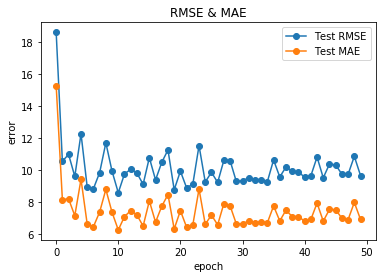

In [22]:
#plt.plot(train_rmse_lst,'-o')
#plt.plot(train_mae_lst,'-o')
plt.plot(test_rmse_lst,'-o')
plt.plot(test_mae_lst,'-o')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(['Test RMSE','Test MAE'])
plt.title('RMSE & MAE')

In [23]:
model.eval()
with torch.set_grad_enabled(False):  # save memory during inference

    train_mae, train_mse = compute_mae_and_mse(model, train_loader,
                                               device=device)
    valid_mae, valid_mse = compute_mae_and_mse(model, valid_loader,
                                               device=device)
    test_mae, test_mse = compute_mae_and_mse(model, test_loader,
                                             device=device)

    s = 'MAE/RMSE: | Train: %.2f/%.2f | Valid: %.2f/%.2f | Test: %.2f/%.2f' % (
        train_mae, torch.sqrt(train_mse),
        valid_mae, torch.sqrt(valid_mse),
        test_mae, torch.sqrt(test_mse))
    print(s)
    #with open(LOGFILE, 'a') as f:
        #f.write('%s\n' % s)

s = 'Total Training Time: %.2f min' % ((time.time() - start_time)/60)
print(s)
#with open(LOGFILE, 'a') as f:
    #f.write('%s\n' % s)

MAE/RMSE: | Train: 1.35/4.19 | Valid: 6.77/9.53 | Test: 6.89/9.65
Total Training Time: 772.96 min


In [ ]:
PATH = 'Model'
########## EVALUATE BEST MODEL ######
model.load_state_dict(torch.load(os.path.join(PATH, 'best_model_cacd_lipstick_eyecolor_geo.pt')))
model.eval()

with torch.set_grad_enabled(False):
    train_mae, train_mse = compute_mae_and_mse(model, train_loader,
                                               device=device)
    valid_mae, valid_mse = compute_mae_and_mse(model, valid_loader,
                                               device=device)
    test_mae, test_mse = compute_mae_and_mse(model, test_loader,
                                             device=device)

    s = 'MAE/RMSE: | Best Train: %.2f/%.2f | Best Valid: %.2f/%.2f | Best Test: %.2f/%.2f' % (
        train_mae, torch.sqrt(train_mse),
        valid_mae, torch.sqrt(valid_mse),
        test_mae, torch.sqrt(test_mse))
    print(s)
    #with open(LOGFILE, 'a') as f:
        #f.write('%s\n' % s)

In [60]:
PATH = 'Model'
model.load_state_dict(torch.load(os.path.join(PATH, 'best_model_cacd_lipstick_eyecolor_geo.pt')))
model.eval()
tgt = []
pred = []
with torch.set_grad_enabled(False):
    for batch_idx,(features,targets) in enumerate(test_loader):
        features = features.to(device)
        targets = targets.to(device)
        tgt.append(targets.flatten().tolist())
        #print(targets)
        logits, probas = model(features)
        _,predicted_labels = torch.max(probas, 1)
        pred.append(predicted_labels.flatten().tolist())

In [61]:
# Accuracy Calculation
count = 0
for i in range(124):
    for j in range(255):
        if tgt[i][j] == pred[i][j]:
            count = count + 1
print(count/(128*256)) 

0.05401611328125


In [62]:
import pandas as pd
from itertools import chain,groupby
pred_list = list(chain.from_iterable(pred))
tgt_list = list(chain.from_iterable(tgt))
df = pd.DataFrame(list(zip(tgt_list, pred_list)),
               columns =['Original_Label', 'Predicted_Label'])
df.to_csv(r'Prediction_CACD_Lipstick_EyeColor_Geo.csv', index = False)

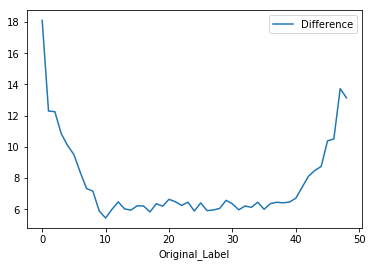

In [22]:
df2 = pd.read_csv('Prediction_Difference_CACD_FaceSwap_Geo.csv')
df2.groupby(['Original_Label']).mean().plot()